In [23]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from PIL import Image

import numpy as np

import copy
import pickle
import os

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [24]:
with open('./pretrained/ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

In [25]:
device = torch.device('cuda')
G_eval = copy.deepcopy(G).eval().requires_grad_(False).to(device) # use g as the evaluation mode (do not track gradients)

# npz

### after

In [26]:
after = np.load('./output/video/after4/after4.npz')
after = torch.from_numpy(after['w']).to(device)
after.size()

torch.Size([1, 18, 512])

In [27]:
after = after.resize(18, 512)
after.size()

torch.Size([18, 512])

In [28]:
synth1 = G.synthesis(after.unsqueeze(0), noise_mode='const')
synth1 = (synth1 + 1) * (255/2)
synth1 = synth1.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


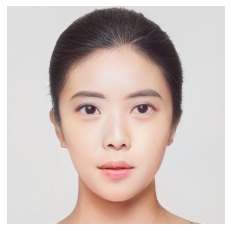

In [29]:
plt.imshow(synth1)
plt.axis('off')
plt.show()

### before

In [30]:
before = np.load('./output/video/before4/before4.npz')
before = torch.from_numpy(before['w']).to(device)
before.size()

torch.Size([1, 18, 512])

In [31]:
before = before.resize(18, 512)
before.size()

torch.Size([18, 512])

In [32]:
synth2 = G.synthesis(before.unsqueeze(0), noise_mode='const')
synth2 = (synth2 + 1) * (255/2)
synth2 = synth2.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


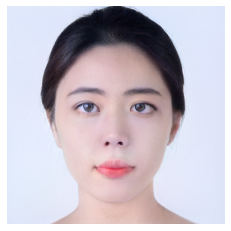

In [33]:
plt.imshow(synth2)
plt.axis('off')
plt.show()

### after_vec - before_vec

In [34]:
aesthetic_w = after - before

In [35]:
np_w = aesthetic_w.cpu().numpy()
np.save('./output/aesthetic_vec/before_after4/aesthetic_w4', np_w)

In [36]:
aesthetic_vec = G.synthesis(aesthetic_w.unsqueeze(0), noise_mode='const')
aesthetic_vec = (aesthetic_vec + 1) * (255/2)
aesthetic_vec = aesthetic_vec.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


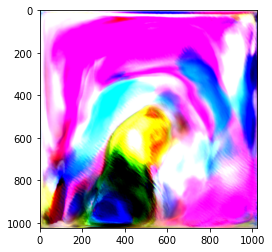

In [37]:
plt.imshow(aesthetic_vec)

In [38]:
before_to_after_img = Image.fromarray(aesthetic_vec)
before_to_after_img.save('./output/aesthetic_vec/before_after4/aesthetic_vec4.png', format='PNG')

### before to after

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


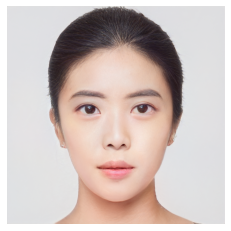

In [21]:
before_to_after = G.synthesis((before + aesthetic_w*0.77).unsqueeze(0), noise_mode='const')
before_to_after = (before_to_after + 1) * (255/2)
before_to_after = before_to_after.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

plt.imshow(before_to_after)
plt.axis('off')
plt.show()

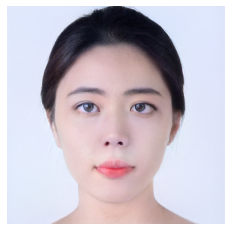

In [17]:
# generated before image
plt.imshow(synth2)
plt.axis('off')
plt.show()

In [18]:
before_to_after_img = Image.fromarray(before_to_after)
before_to_after_img.save('./output/video/before4/before_to_after4.png', format='PNG')

# npy

### after

In [ ]:
after = np.load('./output/weight/after4.npy')
after = torch.from_numpy(after).to(device)
after.size()

In [ ]:
synth1 = G.synthesis(after.unsqueeze(0), noise_mode='const')
synth1 = (synth1 + 1) * (255/2)
synth1 = synth1.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [ ]:
plt.imshow(synth1)
plt.axis('off')
plt.show()

### before

In [ ]:
before = np.load('./output/weight/before4.npy')
before = torch.from_numpy(before).to(device)
before.size()

In [ ]:
synth2 = G.synthesis(before.unsqueeze(0), noise_mode='const')
synth2 = (synth2 + 1) * (255/2)
synth2 = synth2.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [ ]:
plt.imshow(synth2)
plt.axis('off')
plt.show()

### after_vec - before_vec

In [ ]:
aesthetic_w = after - before

In [ ]:
aesthetic_vec = G.synthesis(aesthetic_w.unsqueeze(0), noise_mode='const')
aesthetic_vec = (aesthetic_vec + 1) * (255/2)
aesthetic_vec = aesthetic_vec.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [ ]:
plt.imshow(aesthetic_vec)

### before to after

In [ ]:
before_to_after = G.synthesis((before + aesthetic_vec*0.47).unsqueeze(0), noise_mode='const')
before_to_after = (before_to_after + 1) * (255/2)
before_to_after = before_to_after.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

plt.imshow(before_to_after)
plt.axis('off')
plt.show()

In [ ]:
# generated before image
plt.imshow(synth2)
plt.axis('off')
plt.show()